In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
start = '2010-01-01'
end = '2021-12-31'

df = data.DataReader('AAPL','yahoo',start,end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,180.100540
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,179.061859
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,179.151749
2021-12-30,180.570007,178.089996,179.470001,178.199997,59773000.0,177.973251
2021-12-31,179.229996,177.259995,178.089996,177.570007,64062300.0,177.344055


In [3]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.444381
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544687
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556003
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451719
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439794


In [4]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


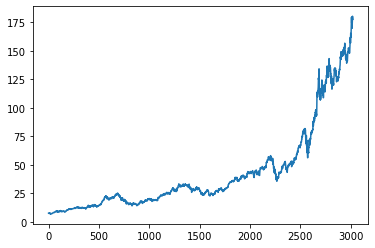

In [5]:
plt.plot(df.Close)

In [6]:
df

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0
...,...,...,...,...,...
3017,180.419998,177.070007,177.089996,180.330002,74919600.0
3018,181.330002,178.529999,180.160004,179.289993,79144300.0
3019,180.630005,178.139999,179.330002,179.380005,62348900.0
3020,180.570007,178.089996,179.470001,178.199997,59773000.0


In [7]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3017    153.3444
3018    153.6667
3019    153.9991
3020    154.3202
3021    154.6399
Name: Close, Length: 3022, dtype: float64

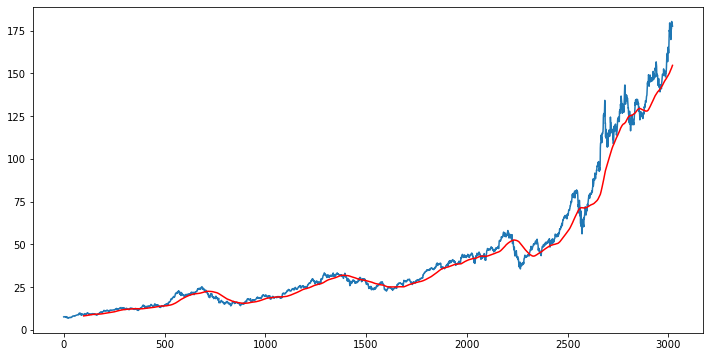

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [9]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3017    142.85570
3018    143.13220
3019    143.40125
3020    143.66845
3021    143.95365
Name: Close, Length: 3022, dtype: float64

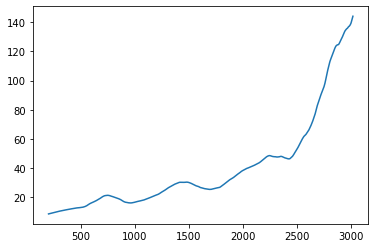

In [10]:
plt.plot(ma200)

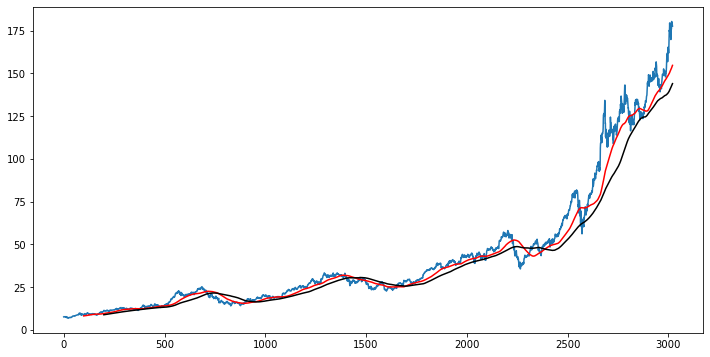

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'k')

In [12]:
df.shape

(3022, 5)

Spliting Data into Training and Testing

In [13]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(2115, 1)
(907, 1)


In [14]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [15]:
data_testing.head()

,Close
2115,46.974998
2116,46.875000
2117,46.717499
2118,47.560001
2119,47.957500


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
data_training_array = scaler.fit_transform(data_training)
data_training

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714
...,...
2110,46.907501
2111,46.790001
2112,47.090000
2113,47.037498


In [18]:
data_training_array.shape

(2115, 1)

In [19]:
x_train = []
y_train = [] 
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])
    
x_train,y_train=np.array(x_train),np.array(y_train)    
    

# ML MODEL

In [20]:
from keras.layers import Dense, Dropout ,LSTM

In [21]:
from keras.models import Sequential

In [22]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [24]:
model.compile(optimizer='adam' , loss = 'mean_squared_error')
model.fit(x_train , y_train , epochs=50)

Epoch 1/50
63/63 [==============================] - 14s 157ms/step - loss: 0.0412
Epoch 2/50
63/63 [==============================] - 10s 156ms/step - loss: 0.0083
Epoch 3/50
63/63 [==============================] - 11s 173ms/step - loss: 0.0082
Epoch 4/50
63/63 [==============================] - 12s 186ms/step - loss: 0.0068
Epoch 5/50
63/63 [==============================] - 14s 225ms/step - loss: 0.0061
Epoch 6/50
63/63 [==============================] - 13s 209ms/step - loss: 0.0060
Epoch 7/50
63/63 [==============================] - 13s 201ms/step - loss: 0.0055
Epoch 8/50
63/63 [==============================] - 13s 202ms/step - loss: 0.0053
Epoch 9/50
63/63 [==============================] - 12s 197ms/step - loss: 0.0050
Epoch 10/50
63/63 [==============================] - 11s 180ms/step - loss: 0.0046
Epoch 11/50
63/63 [==============================] - 13s 201ms/step - loss: 0.0050
Epoch 12/50
63/63 [==============================] - 13s 204ms/step - loss: 0.0043
Epoch 13/50
6

In [25]:
model.save('keras_model.h5')

In [26]:
data_testing.head()

,Close
2115,46.974998
2116,46.875000
2117,46.717499
2118,47.560001
2119,47.957500


In [27]:
past_100_days = data_training.tail(100)

In [28]:
final_df = past_100_days.append(data_testing , ignore_index=True)

In [29]:
final_df.head()

,Close
0,43.057499
1,43.257500
2,43.750000
3,43.587502
4,43.582500


In [40]:
input_data = scaler.fit_transform(final_df)

In [31]:
input_data.shape

(1007, 1)

In [32]:
x_test = []
y_test = []

for i in range(100 , input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [33]:
x_test , y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(907, 100, 1)
(907,)


Making Predictions

In [34]:
y_predicted = model.predict(x_test)
y_predicted.shape

(907, 1)

In [37]:
scaler.scale_

array([0.00690691])

In [38]:
scale_factor = 1/0.00690691
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

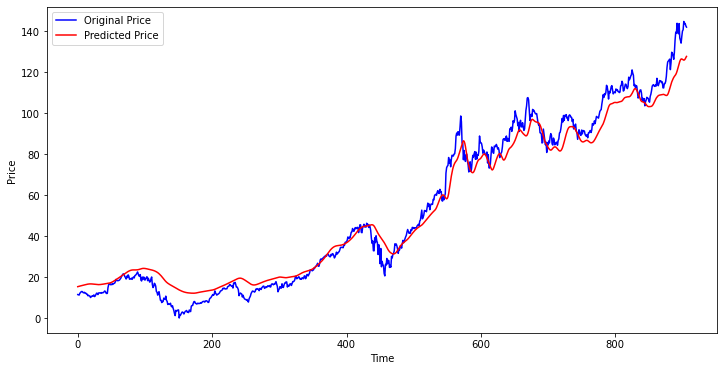

In [39]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label = 'Original Price')
plt.plot(y_predicted , 'r' , label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()